## **1. 新闻发布时间滞后分析** ##

In [1]:
import pandas as pd

d:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [32]:
data = pd.read_excel('E:/厦门大学/论文合作/大模型+新闻情绪/test_data.xlsx')

d:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [33]:

data = data.drop([0, 1], axis=0)

In [34]:
data['text_length'] = data['NewsContent'].apply(lambda x: len(str(x)))

In [35]:
import re
from datetime import datetime
def extract_date(text):
    # 正则表达式确保同时有“月”和“日”部分
    match = re.search(r'(\d{1,2})月(\d{1,2})日', str(text))
    if match:
        month = int(match.group(1))
        day = int(match.group(2))
        # 默认为2024年
        date_str = f'2024-{month:02d}-{day:02d}'
        try:
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')
            return date_obj
        except ValueError:
            return None
    return None

data['news_data'] = data['NewsContent'].apply(extract_date)

In [36]:
def convert_declare_date(declare_date):
    try:
        declare_obj = datetime.strptime(str(declare_date), '%Y-%m-%d %H:%M:%S')
        return declare_obj
    except Exception as e:
        return None

data['declare_data'] = data['FullDeclareDate'].apply(convert_declare_date)

In [37]:
def calculate_gap_day(row):
    if pd.notna(row['news_data']) and pd.notna(row['declare_data']):
        return (row['news_data'] - row['declare_data']).days
    elif pd.isna(row['news_data']) and pd.notna(row['declare_data']):
        return None
    return None
data['gap_day'] = data.apply(calculate_gap_day, axis=1)

In [49]:
def handle_missing_news_data(row):
    if pd.isna(row['news_data']):
        text = str(row['NewsContent'])
        if '昨天' in text or '昨日' in text:
            return -1
        elif '前日' in text or '前天' in text:
            return -2
        elif '近日' in text:
            return -1
    return None
data['gap_day'] = data.apply(lambda row: handle_missing_news_data(row) if pd.isna(row['gap_day']) else row['gap_day'], axis=1)

In [50]:
# 仅筛选gap_day列中值在-2到10之间的行
filtered_data = data[(data['gap_day'] >= -6) & (data['gap_day'] <= 9)]

# 统计gap_day列的出现次数
gap_day_counts = filtered_data['gap_day'].value_counts().sort_index()

# 计算每个取值的频率
gap_day_freq = gap_day_counts / len(filtered_data)

# 显示统计结果
result = pd.DataFrame({
    'Count': gap_day_counts,
    'Frequency': gap_day_freq
})

print(result)


          Count  Frequency
gap_day                   
-6.0       1777   0.007114
-5.0       2616   0.010473
-4.0       5850   0.023421
-3.0       8703   0.034843
-2.0      39253   0.157153
-1.0     183100   0.733060
 0.0       4641   0.018581
 1.0       1901   0.007611
 2.0        511   0.002046
 3.0        305   0.001221
 4.0        270   0.001081
 5.0        232   0.000929
 6.0        230   0.000921
 7.0        170   0.000681
 8.0        108   0.000432
 9.0        108   0.000432


In [47]:
data

,NewsID,DeclareDate,Title,FullDeclareDate,Autor,KeyWord,NewsSummary,NewsContent,NewsSource,text_length,news_data,declare_data,gap_day
2,108524611,2024-09-02,A股首例，今日摘牌！正起诉控股股东,2024-09-02 08:43:00,NaN,"*ST深天,终止上市,公司,股票,深交所,控股股东,首例,起诉,A股,今日",公告显示，6月27日至7月24日，*ST深天通过深交所交易系统连续二十个交易日的股票收盘市值...,A股首例市值退市股即将摘牌。 9月1日晚间，*ST深天（000023，股价：1.72元；总...,每日经济新闻,1407,2024-09-01,2024-09-02 08:43:00,-2.0
3,108524612,2024-09-02,又有两家上市公司实控人被留置！利空之下股价会跌停吗？,2024-09-02 08:42:00,NaN,"耐科装备,杨君祥,*ST大药,公司,黄明玖,跌停,上市,股价,之下,公告",图片来源：耐科装备公告截图 *ST大药9月1日公告，公司与实际控制人、董事长兼总经理杨君祥...,又见A股上市公司实控人被留置，涉事公司分别是半导体设备供应商耐科装备（688419.SH）和...,21世纪经济报道,1187,2024-08-30,2024-09-02 08:42:00,-4.0
4,108524621,2024-09-02,【早知道】五部门推动电动自行车以旧换新；A股上市公司中期分红创历史新高,2024-09-02 08:47:00,NaN,"电动自行车,电池,公司,以旧换新,住房,部门,推动,中期,A股,历史",财政部：建立全口径地方债务监测机制坚决遏制化债不实和新增隐性债务 财政部发布2024年上...,摘要 国常会：研究推动保险业高质量发展的若干意见； 央行8月净买入国债1000亿元；...,证券时报·e公司,2000,2024-08-30,2024-09-02 08:47:00,-4.0
5,108524622,2024-09-02,【打新日历】8月新股，首日平均涨幅152%！本周3只新股申购,2024-09-02 08:47:00,NaN,"众鑫股份,慧翰股份,珂玛科技,车联网,物联网,首日,新股,打新,平均涨幅,新股申购",打新日历 9月2日 慧翰股份（301600）是一家致力于为智能汽车及产业物联网客户提...,据目前安排，若无变化本周（9月2日到6日）共有3只新股申购。其中上证主板1只，创业板1只，北...,证券时报·e公司,2000,2024-09-02,2024-09-02 08:47:00,-1.0
6,108524623,2024-09-02,中信建投：关注医疗器械行业的投资机会,2024-09-02 08:46:00,阙福生,"医疗器械,中华人民共和国,意见,管理,药监局,中信建投,医疗器械行业,投资机会,关注,医疗",有国产替代和新品放量、出海业务快速发展逻辑的公司，有望在行业低基数背景下实现同比高增长、环比...,证券时报网讯，中信建投研报指出，2024年上半年，根据样本数据，医疗器械板块收入同比增长1%...,证券时报网,330,NaT,2024-09-02 08:46:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319857,108866104,2024-12-11,OpenAI技术直播第四弹！推出ChatGPT内置工具Canvas，有三大核心功能,2024-12-11 11:33:00,NaN,"Canvas,ChatGPT,OpenAI,代码,用户,功能,工具,三大,核心,推出",NaN,昨天的Sora掀起热潮，今天OpenAI又给我们带来了升级版Canvas。Canvas正式向...,每日经济新闻,1356,NaT,2024-12-11 11:33:00,1.0
319858,108866105,2024-12-11,中公教育在海南成立新公司 业务含数字技术服务,2024-12-11 11:25:00,NaN,"中公教育,海南,公司,教育,服务,成立,数字技术,新公司,业务,显示",NaN,证券时报e公司讯，企查查APP显示，近日，海南中公致远教育科技有限公司成立，法定代表人为李德...,证券时报网,117,NaT,2024-12-11 11:25:00,-1.0
319859,108866106,2024-12-11,波音又曝裁员近千人,2024-12-11 11:24:00,NaN,"波音,裁员,波音公司,美国,飞机制造,全球,计划,报道,媒体,新华社",NaN,南方财经12月11日电，据新华社援引美国媒体报道，美国飞机制造商波音公司将再次裁员，涉及华盛...,南方财经网,100,2024-12-11,2024-12-11 11:24:00,-1.0
319860,108866107,2024-12-11,亚马逊迎战以Temu为首的低价电商冲击波,2024-12-11 11:22:00,陈振芳,"亚马逊,中国,卖家,电商,全球,Temu,低价,迎战,冲击波,为首",NaN,近日，在2024年亚马逊全球开店跨境峰会上，亚马逊全球副总裁、亚马逊全球开店亚太区执行总裁戴...,界面新闻,2000,2024-09-01,2024-12-11 11:22:00,-102.0


In [27]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ...,

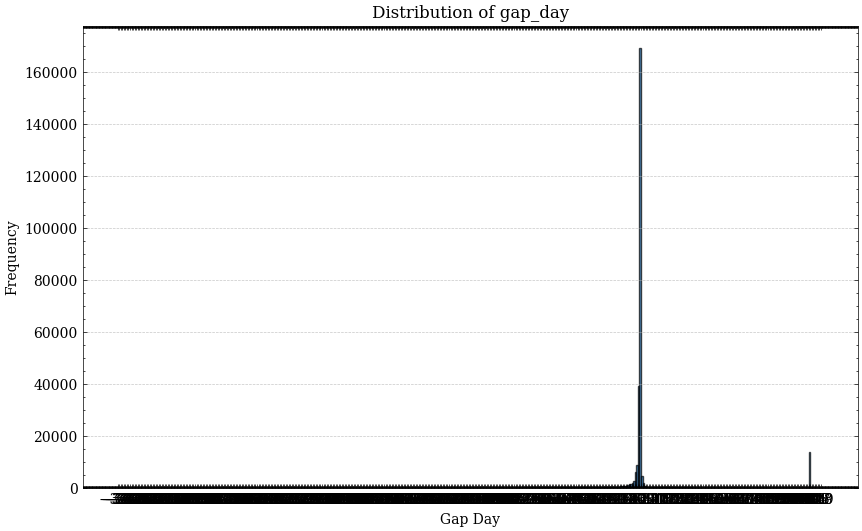

In [28]:
# 绘制gap_day的直方图
plt.figure(figsize=(10, 6))
plt.hist(data['gap_day'].dropna(), bins=range(int(data['gap_day'].min()), int(data['gap_day'].max()) + 2), edgecolor='black', alpha=0.7)
plt.title('Distribution of gap_day')
plt.xlabel('Gap Day')
plt.ylabel('Frequency')
plt.xticks(range(int(data['gap_day'].min()), int(data['gap_day'].max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.show()

## **2. 新闻统计分析** ##